In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")

In [ ]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
print(data.isnull().sum())

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [ ]:
# Impute missing values with the column mean
data['3P%'].fillna(data['3P%'].mean(), inplace=True)

In [ ]:
print(data.isnull().sum())

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


In [ ]:
print(data.dtypes)

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object


In [ ]:
print(data.describe())

                GP          MIN          PTS          FGM          FGA  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     60.414179    17.624627     6.801493     2.629104     5.885299   
std      17.433992     8.307964     4.357545     1.683555     3.593488   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.875000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.550000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     44.169403     0.247612     0.779179    19.308126     1.297687   
std       6.137679     0.383688     1.061847    15.956966     0.987246   
min      23.800000     0.000000     0

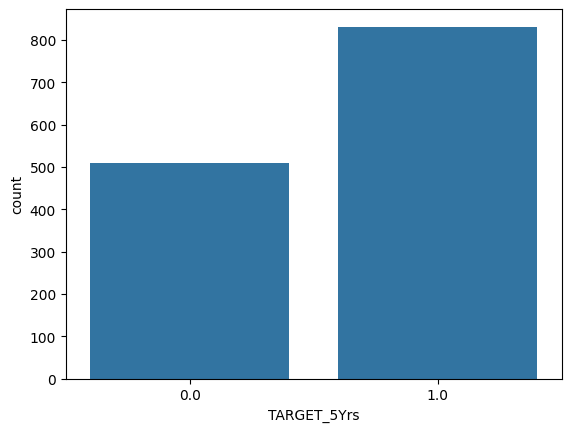

In [ ]:
sns.countplot(x='TARGET_5Yrs', data=data)
plt.show()

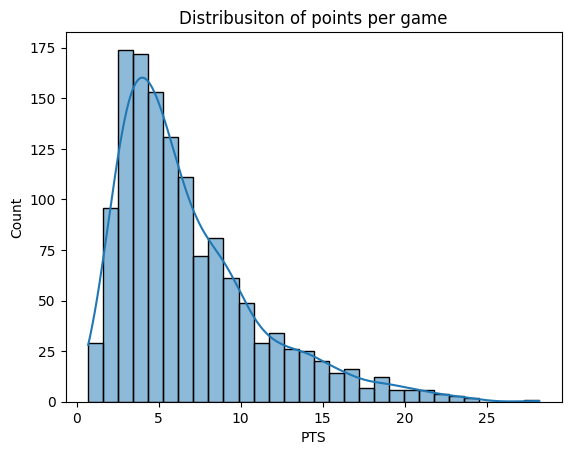

In [ ]:
sns.histplot(data['PTS'], kde=True)
plt.title('Distribusiton of points per game')
plt.show()

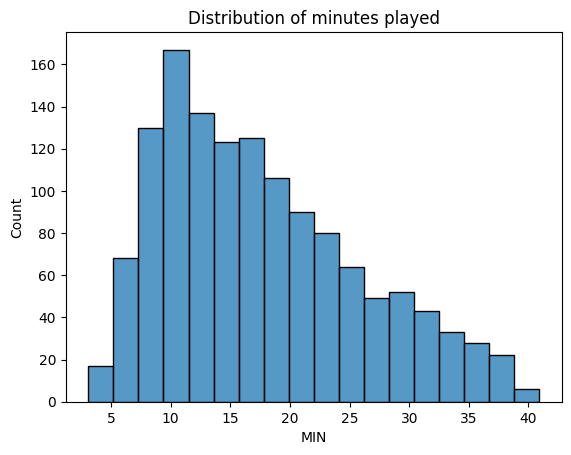

In [ ]:
sns.histplot(data['MIN'])
plt.title('Distribution of minutes played')
plt.show()

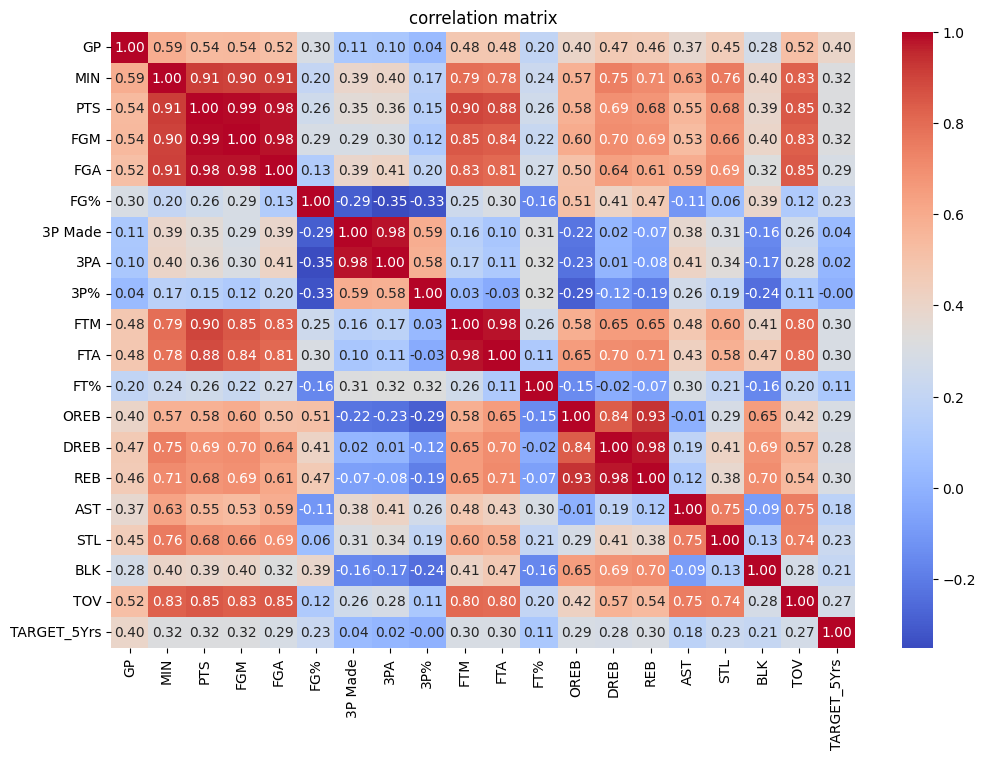

In [ ]:
data_minus_name = data.drop(['Name'], axis=1)
corr_matrix = data_minus_name.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix')
plt.show()

In [ ]:
numeric_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])


In [ ]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


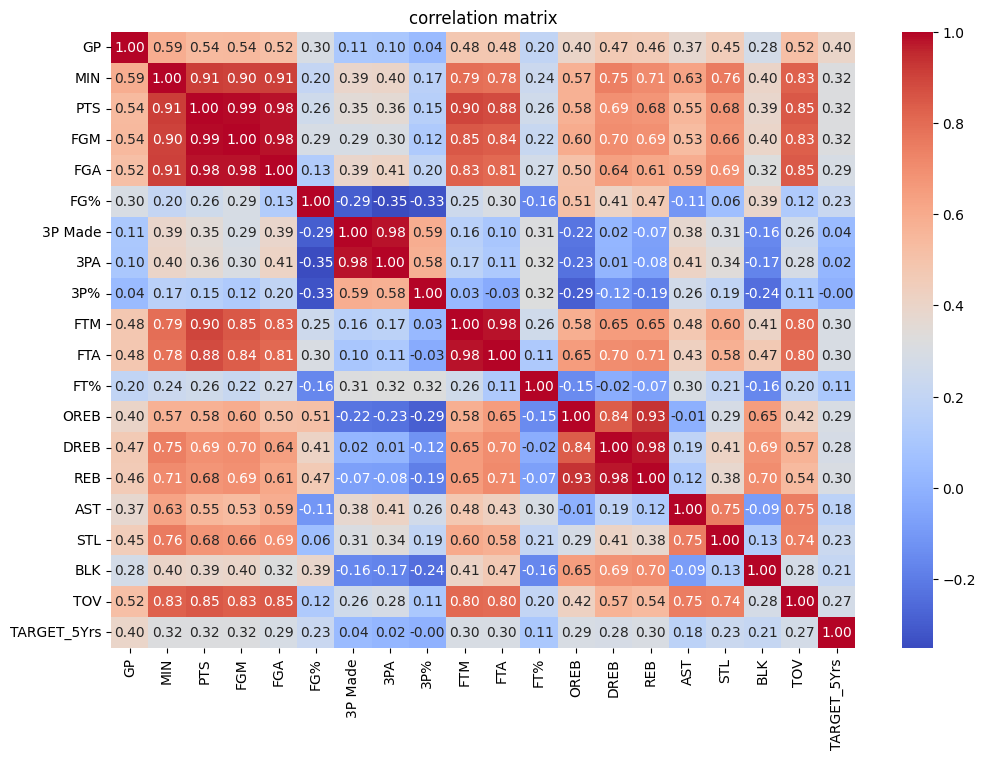

In [ ]:
data_minus_name = data.drop(['Name'], axis=1)
corr_matrix = data_minus_name.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix')
plt.show()

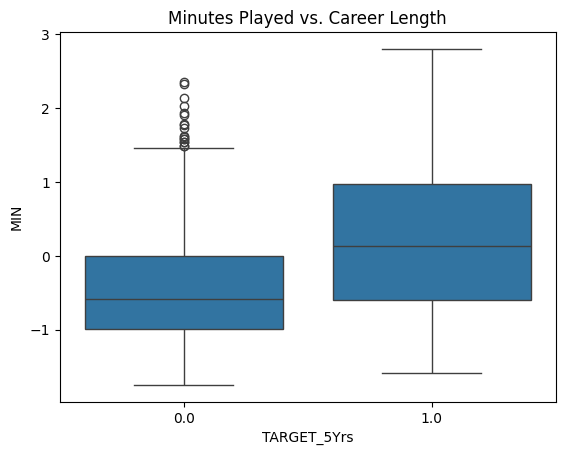

In [ ]:
sns.boxplot(x='TARGET_5Yrs', y='MIN', data=data)
plt.title('Minutes Played vs. Career Length')
plt.show()


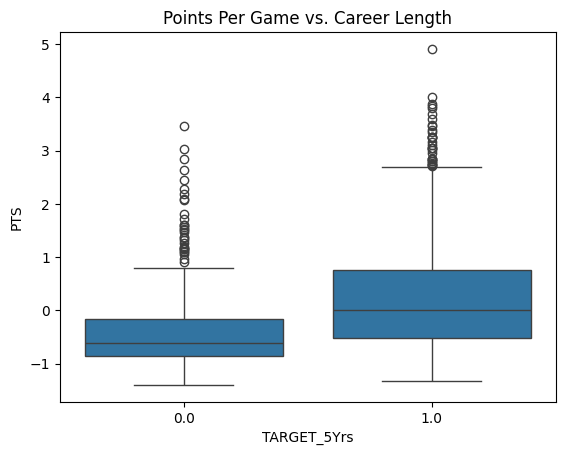

In [ ]:
sns.boxplot(x='TARGET_5Yrs', y='PTS', data=data)
plt.title('Points Per Game vs. Career Length')
plt.show()


In [ ]:
features_to_keep = ['GP', 'MIN', 'PTS', 'FTM', 'REB', 'TOV', 'STL', 'BLK', 'FG%']
features_to_keep.append('TARGET_5Yrs')
data_necessary = data[features_to_keep]
print("Necessary dataset shape: ", data_necessary.shape)
print(data_necessary.head())
data_necessary.to_csv('/content/drive/MyDrive/Colab Notebooks/nba_data/data_necessary_data.csv', index=False)

Necessary dataset shape:  (1340, 10)
   GP   MIN  PTS  FTM  REB  TOV  STL  BLK   FG%  TARGET_5Yrs
0  36  27.4  7.4  1.6  4.1  1.3  0.4  0.4  34.7          0.0
1  35  26.9  7.2  2.6  2.4  1.6  1.1  0.5  29.6          0.0
2  74  15.3  5.2  0.9  2.2  1.0  0.5  0.3  42.2          0.0
3  58  11.6  5.7  0.9  1.9  1.0  0.6  0.1  42.6          1.0
4  48  11.5  4.5  1.3  2.5  0.8  0.3  0.4  52.4          1.0


In [ ]:
X = data_necessary.drop('TARGET_5Yrs', axis=1)
y = data_necessary['TARGET_5Yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (1072, 9)
Training Labels Shape: (1072,)
Testing Features Shape: (268, 9)
Testing Labels Shape: (268,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Model accuracy: 0.7351
              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        99
         1.0       0.76      0.84      0.80       169

    accuracy                           0.74       268
   macro avg       0.72      0.70      0.70       268
weighted avg       0.73      0.74      0.73       268



In [ ]:
logreg_balance = LogisticRegression(class_weight='balanced')
logreg_balance.fit(X_train_scaled, y_train)
y_pred_balanced = logreg_balance.predict(X_test_scaled)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65        99
         1.0       0.81      0.73      0.77       169

    accuracy                           0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.73      0.72      0.72       268



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Regularization tuning using GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']}  # L1 requires liblinear solver
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Recall: {grid.best_score_}")


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Recall: 0.8096605149236729


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train)
y_pred_poly = logreg_poly.predict(X_test_poly)

print(f"Accuracy: {accuracy_score(y_test, y_pred_poly)}")
print(classification_report(y_test, y_pred_poly))


Accuracy: 0.7388059701492538
              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61        99
         1.0       0.76      0.85      0.80       169

    accuracy                           0.74       268
   macro avg       0.72      0.70      0.71       268
weighted avg       0.73      0.74      0.73       268



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66        99
         1.0       0.82      0.72      0.76       169

    accuracy                           0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.74      0.72      0.72       268



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66        99
         1.0       0.81      0.76      0.79       169

    accuracy                           0.74       268
   macro avg       0.72      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:04:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.52      0.58        99
         1.0       0.75      0.85      0.80       169

    accuracy                           0.73       268
   macro avg       0.71      0.68      0.69       268
weighted avg       0.72      0.73      0.72       268



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50        99
         1.0       0.71      0.78      0.74       169

    accuracy                           0.66       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.65      0.66      0.65       268



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a scoring function based on recall
def custom_scoring(estimator, X, y):
    y_pred = estimator.predict(X)
    return recall_score(y, y_pred)

# Example using Random Forest
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10], 'class_weight': ['balanced']}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring=custom_scoring)
grid_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best Recall: {grid_rf.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "<ipython-input-60-f0220df772b6>", line 6, in custom_scoring
    return recall_score(y, y_pred)
NameError: name 'recall_score' is not defined

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "<ipyt

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 50}
Best Recall: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "<ipython-input-60-f0220df772b6>", line 6, in custom_scoring
    return recall_score(y, y_pred)
NameError: name 'recall_score' is not defined

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate the logistic regression model with the best parameters
best_logreg = LogisticRegression(C=1, penalty='l2', solver='liblinear')

# Train the model on the training data
best_logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_best = best_logreg.predict(X_test_scaled)

# Evaluate the model
print(f"Best Logistic Regression Accuracy: {best_logreg.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_best))


Best Logistic Regression Accuracy: 0.7350746268656716
              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        99
         1.0       0.76      0.84      0.80       169

    accuracy                           0.74       268
   macro avg       0.72      0.70      0.70       268
weighted avg       0.73      0.74      0.73       268



In [ ]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Get precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Adjust the threshold manually (e.g., 0.4 instead of 0.5)
custom_threshold = 0.4
y_pred_custom_threshold = (y_probs >= custom_threshold).astype(int)

# Evaluate with new threshold
print(f"Custom Threshold {custom_threshold} - Classification Report:")
print(classification_report(y_test, y_pred_custom_threshold))


Custom Threshold 0.4 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.34      0.46        99
         1.0       0.70      0.91      0.79       169

    accuracy                           0.70       268
   macro avg       0.70      0.63      0.63       268
weighted avg       0.70      0.70      0.67       268



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.5)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56        99
         1.0       0.74      0.82      0.78       169

    accuracy                           0.70       268
   macro avg       0.68      0.66      0.67       268
weighted avg       0.69      0.70      0.69       268



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_weighted = RandomForestClassifier(n_estimators=100, class_weight={0: 2, 1: 1})
rf_model_weighted.fit(X_train_scaled, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test_scaled)

print("Weighted Random Forest Performance:")
print(classification_report(y_test, y_pred_rf_weighted))


Weighted Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.65      0.51      0.57        99
         1.0       0.74      0.84      0.79       169

    accuracy                           0.72       268
   macro avg       0.70      0.67      0.68       268
weighted avg       0.71      0.72      0.71       268



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=100)),
              ('svc', SVC(kernel='rbf', probability=True))]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)

print("Stacking Model Performance:")
print(classification_report(y_test, y_pred_stack))


Stacking Model Performance:
              precision    recall  f1-score   support

         0.0       0.69      0.52      0.59        99
         1.0       0.75      0.86      0.80       169

    accuracy                           0.74       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.73      0.74      0.73       268



In [ ]:
# Example: Logistic Regression with class weights
from sklearn.linear_model import LogisticRegression

logreg_weighted = LogisticRegression(C=1, penalty='l2', solver='liblinear', class_weight='balanced')
logreg_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = logreg_weighted.predict(X_test_scaled)

print("Classification Report for Logistic Regression with Class Weights")
print(classification_report(y_test, y_pred_weighted))


Classification Report for Logistic Regression with Class Weights
              precision    recall  f1-score   support

         0.0       0.61      0.70      0.65        99
         1.0       0.81      0.73      0.77       169

    accuracy                           0.72       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.73      0.72      0.72       268



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_weighted.fit(X_train_scaled, y_train)
y_pred_rf_weighted = rf_weighted.predict(X_test_scaled)

print("Classification Report for Random Forest with Class Weights")
print(classification_report(y_test, y_pred_rf_weighted))


Classification Report for Random Forest with Class Weights
              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57        99
         1.0       0.74      0.87      0.80       169

    accuracy                           0.73       268
   macro avg       0.71      0.68      0.68       268
weighted avg       0.72      0.73      0.72       268



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

# Train a model on the undersampled data
logreg_rus = LogisticRegression(C=1, penalty='l2', solver='liblinear')
logreg_rus.fit(X_rus, y_rus)
y_pred_rus = logreg_rus.predict(X_test_scaled)

print("Classification Report after Random Undersampling")
print(classification_report(y_test, y_pred_rus))


Classification Report after Random Undersampling
              precision    recall  f1-score   support

         0.0       0.60      0.70      0.64        99
         1.0       0.80      0.73      0.76       169

    accuracy                           0.72       268
   macro avg       0.70      0.71      0.70       268
weighted avg       0.73      0.72      0.72       268



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'class_weight': [{0: 2, 1: 1}, 'balanced']
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='recall', verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and recall score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Recall Score:", grid_search_rf.best_score_)

# Evaluate on test data
y_pred_grid_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_grid_rf))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 100}
Best Recall Score: 0.7884752502399562
              precision    recall  f1-score   support

         0.0       0.62      0.48      0.55        99
         1.0       0.73      0.83      0.78       169

    accuracy                           0.70       268
   macro avg       0.68      0.66      0.66       268
weighted avg       0.69      0.70      0.69       268



In [ ]:
from imblearn.combine import SMOTEENN

# Combine SMOTE and undersampling
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# Train a classifier on the resampled data
logreg_resampled = LogisticRegression(C=1, penalty='l2', solver='liblinear')
logreg_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = logreg_resampled.predict(X_test_scaled)

print("Classification Report with SMOTEENN")
print(classification_report(y_test, y_pred_resampled))


Classification Report with SMOTEENN
              precision    recall  f1-score   support

         0.0       0.53      0.83      0.65        99
         1.0       0.85      0.57      0.68       169

    accuracy                           0.66       268
   macro avg       0.69      0.70      0.66       268
weighted avg       0.73      0.66      0.67       268



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define hyperparameter grid
param_grid_xgb = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 2, 5]
}

# Perform Grid Search
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='recall')
grid_xgb.fit(X_train_scaled, y_train)

# Best parameters and recall
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Recall Score:", grid_xgb.best_score_)

# Evaluate on test data
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_scaled)
print("Classification Report for XGBoost")
print(classification_report(y_test, y_pred_xgb))


Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
Best Recall Score: 1.0
Classification Report for XGBoost
              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        99
         1.0       0.63      0.98      0.77       169

    accuracy                           0.63       268
   macro avg       0.57      0.51      0.41       268
weighted avg       0.58      0.63      0.51       268




Evaluating Logistic Regression:
Confusion Matrix:
 [[255. 254.]
 [143. 688.]]
Average Recall: 0.8278172939298872

Evaluating Random Forest:
Confusion Matrix:
 [[243. 266.]
 [164. 667.]]
Average Recall: 0.8023869839304747

Evaluating Gradient Boosting:
Confusion Matrix:
 [[247. 262.]
 [168. 663.]]
Average Recall: 0.7977481190135886

Evaluating XGBoost:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
 [[260. 249.]
 [211. 620.]]
Average Recall: 0.7460593981044296

Evaluating AdaBoost:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
 [[256. 253.]
 [210. 621.]]
Average Recall: 0.7469333093864322


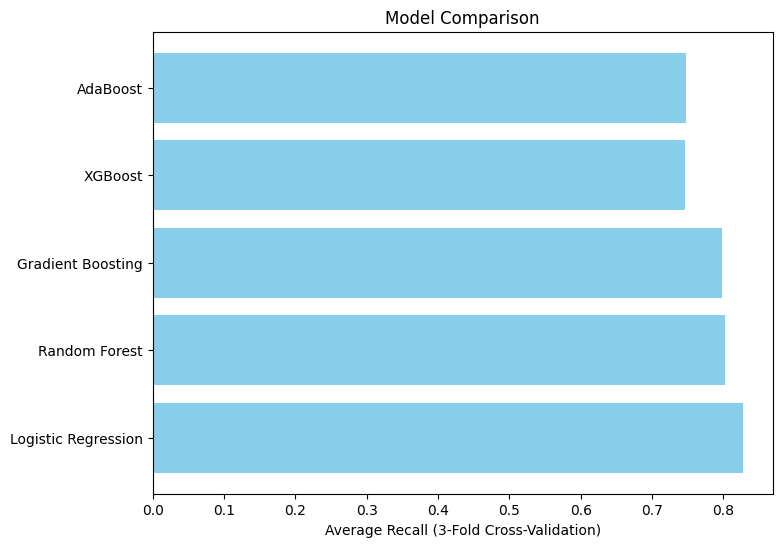

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")

# Extract labels
labels = df['TARGET_5Yrs'].values

# Feature selection based on previous analysis
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

# Handling missing data: fill NaN values with the mean of the respective columns
imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

# Normalize the dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

# Scoring function (as per client's request)
def score_classifier(dataset, classifier, labels):
    """
    Performs 3 random trainings/tests using KFold to build a confusion matrix and prints results
    with precision and recall scores.
    """
    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    confusion_mat = np.zeros((2, 2))
    recall = 0

    for training_ids, test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]

        # Fit and predict using classifier
        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)

        # Update confusion matrix and recall
        confusion_mat += confusion_matrix(test_labels, predicted_labels)
        recall += recall_score(test_labels, predicted_labels)

    recall /= 3
    print("Confusion Matrix:\n", confusion_mat)
    print("Average Recall:", recall)
    return recall

# Instantiate classifiers for comparison
logreg = LogisticRegression(C=1, penalty='l2', solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "AdaBoost": ada
}

# Evaluate each classifier using the client's scoring function
results = {}
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}:")
    recall = score_classifier(X_scaled, clf, labels)
    results[name] = recall

# Visualize recall scores for comparison
plt.figure(figsize=(8, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Average Recall (3-Fold Cross-Validation)')
plt.title('Model Comparison')
plt.show()

# Save the trained model using pickle
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/trained_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

# Save the scaler to preprocess new data the same way
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


Performing GridSearchCV for Logistic Regression:
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best F1 score: 0.7182

Performing GridSearchCV for Random Forest:
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 score: 0.7213

Performing GridSearchCV for Gradient Boosting:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 score: 0.7073

Performing GridSearchCV for XGBoost:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 50, 'subsample': 0.8}
Best F1 score: 0.7137

Performing GridSearchCV for AdaBoost:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
Best F1 score: 0.7117

Evaluating best Logistic Regression model:
Confusion Matrix:
 [[265. 244.]
 [151. 680.]]
Average Recall: 0.8182764682286874
Average F1 Score: 0.7747934612832058

Evaluating best Random Forest model:
Confusion Matrix:
 [[317. 192.]
 [223. 608.]]
Average Recall: 0.7312673859773574
Average F1 Score: 0.7450279389380962

Evaluating best Gradient Boosting model:
Confusion Matrix:
 [[254. 255.]
 [165. 666.]]
Average Recall: 0.8014238051776514
Average F1 Score: 0.7603520142679216

Evaluating best XGBoost model:
Confusion Matrix:
 [[264. 245.]
 [162. 669.]]
Average Recall: 0.8049272317934522
Average F1 Score: 0.7666375786070184

Evaluating best AdaBoost model:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (

Confusion Matrix:
 [[256. 253.]
 [170. 661.]]
Average Recall: 0.7953200438072661
Average F1 Score: 0.7574916206247183


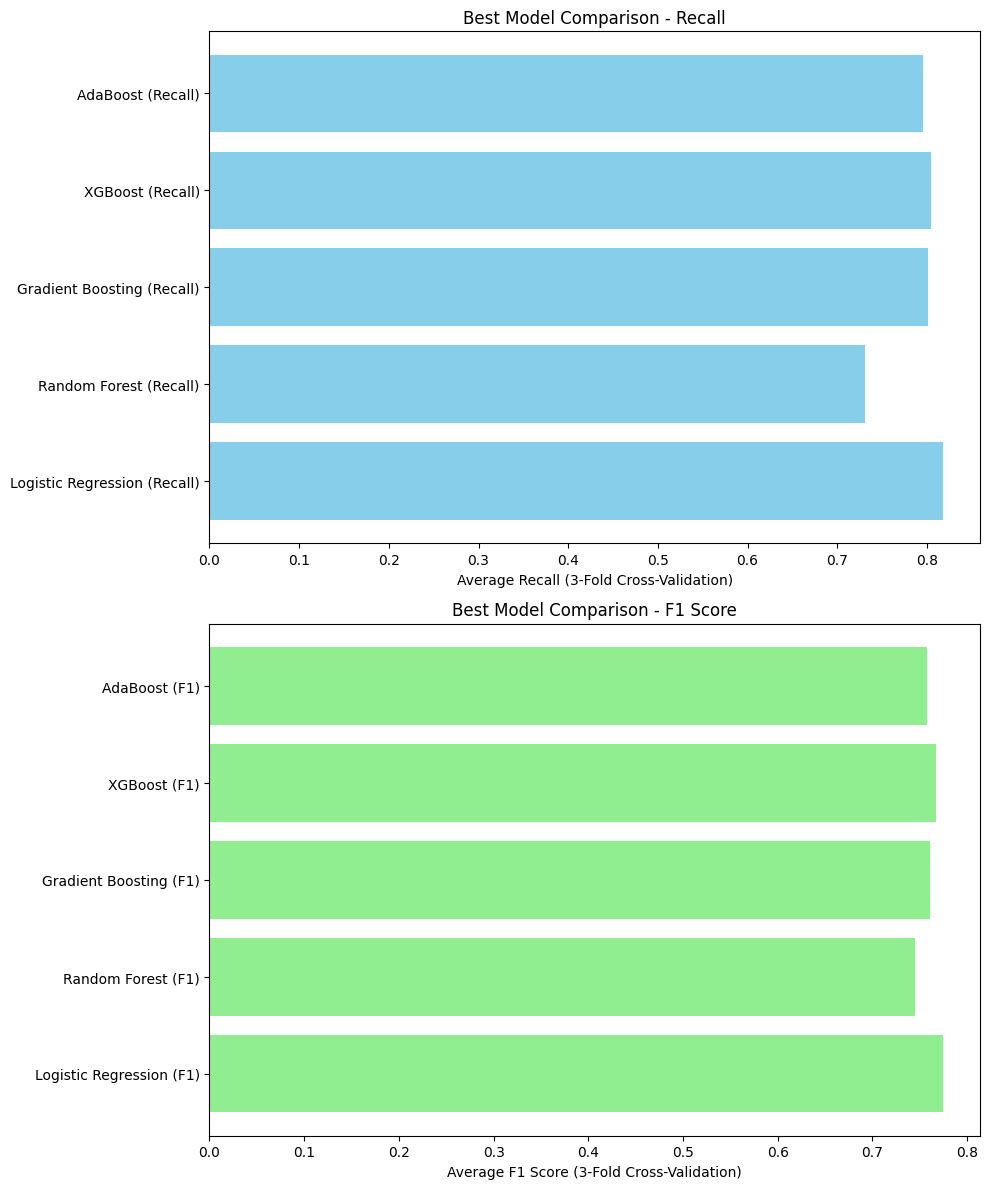


Best overall model: Logistic Regression
Best recall score: 0.8183
Best F1 score: 0.7748

Best model and scaler saved successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score, make_scorer, fbeta_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load dataset and preprocess (same as before)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")
labels = df['TARGET_5Yrs'].values
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

# Define a custom scoring function that uses F1 score
f1_scorer = make_scorer(f1_score, average='binary')
f2_scorer = make_scorer(fbeta_score, beta=2, average='binary')
pr_auc_scorer = make_scorer(average_precision_score)


# Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': [None, 'balanced']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Perform GridSearchCV for each classifier
best_models = {}
for name, clf in classifiers.items():
    print(f"\nPerforming GridSearchCV for {name}:")
    grid_search = GridSearchCV(clf, param_grids[name], cv=3, scoring=pr_auc_scorer, n_jobs=-1)
    grid_search.fit(X_scaled, labels)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best F1 score: {grid_search.best_score_:.4f}")

# Evaluate each best model using both recall and F1 score
def score_classifier(dataset, classifier, labels):
    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    confusion_mat = np.zeros((2, 2))
    recall = 0
    f1 = 0

    for training_ids, test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]

        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)

        confusion_mat += confusion_matrix(test_labels, predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)

    recall /= 3
    f1 /= 3
    print("Confusion Matrix:\n", confusion_mat)
    print("Average Recall:", recall)
    print("Average F1 Score:", f1)
    return recall, f1

results = {}
for name, model in best_models.items():
    print(f"\nEvaluating best {name} model:")
    recall, f1 = score_classifier(X_scaled, model, labels)
    results[name] = {'recall': recall, 'f1': f1}

# Visualize recall and F1 scores for comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Recall scores
ax1.barh([f"{name} (Recall)" for name in results.keys()], [result['recall'] for result in results.values()], color='skyblue')
ax1.set_xlabel('Average Recall (3-Fold Cross-Validation)')
ax1.set_title('Best Model Comparison - Recall')

# F1 scores
ax2.barh([f"{name} (F1)" for name in results.keys()], [result['f1'] for result in results.values()], color='lightgreen')
ax2.set_xlabel('Average F1 Score (3-Fold Cross-Validation)')
ax2.set_title('Best Model Comparison - F1 Score')

plt.tight_layout()
plt.show()

# Identify the best overall model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = best_models[best_model_name]

print(f"\nBest overall model: {best_model_name}")
print(f"Best recall score: {results[best_model_name]['recall']:.4f}")
print(f"Best F1 score: {results[best_model_name]['f1']:.4f}")

# Save the best model using pickle
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model_auc.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler to preprocess new data the same way
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler_auc.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")


Evaluating Logistic Regression:
  Dataset: Original
    Best parameters: {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 1.0, 'precision': 0.6201583049929275, 'f1': 0.765508347555236, 'accuracy': 0.6201583049929275, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 831.]])}
  Dataset: SMOTE Balanced


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    Best parameters: {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 0.6666666666666666, 'precision': 0.33212996389891697, 'f1': 0.4433722021176786, 'accuracy': 0.4975932611311673, 'auc': 0.5, 'confusion_matrix': array([[275., 556.],
       [279., 552.]])}

Evaluating Random Forest:
  Dataset: Original
    Best parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
    Metrics: {'recall': 0.8047739553101626, 'precision': 0.7261248516814642, 'f1': 0.7634288408997203, 'accuracy': 0.6910661677417629, 'auc': 0.6549674244679529, 'confusion_matrix': array([[257., 252.],
       [162., 669.]])}
  Dataset: SMOTE Balanced
    Best parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
    Metrics: {'recall': 0.7183407539154599, 'precision': 0.7393976947335629, 'f1': 0.7286111163920348, 'accuracy': 0.7322503008423585, 'auc': 0.7323103399195167, 'confusion_matrix':

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:38:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6201583049929275, 'f1': 0.765508347555236, 'accuracy': 0.6201583049929275, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 831.]])}
  Dataset: SMOTE Balanced


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.5, 'f1': 0.6666615178439691, 'accuracy': 0.5, 'auc': 0.5, 'confusion_matrix': array([[  0., 831.],
       [  0., 831.]])}

Evaluating AdaBoost:
  Dataset: Original


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 200}
    Metrics: {'recall': 0.8372064119961424, 'precision': 0.7082280412022661, 'f1': 0.767134632896958, 'accuracy': 0.6850770624960291, 'auc': 0.6363732408412768, 'confusion_matrix': array([[222., 287.],
       [135., 696.]])}
  Dataset: SMOTE Balanced


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
    Metrics: {'recall': 0.6737974520250053, 'precision': 0.6895281493691326, 'f1': 0.6814474987572182, 'accuracy': 0.6847172081829122, 'auc': 0.684784556092347, 'confusion_matrix': array([[578., 253.],
       [271., 560.]])}

Best overall model: Logistic Regression - Original
Best parameters: {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Metrics: {'recall': 1.0, 'precision': 0.6201583049929275, 'f1': 0.765508347555236, 'accuracy': 0.6201583049929275, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 831.]])}


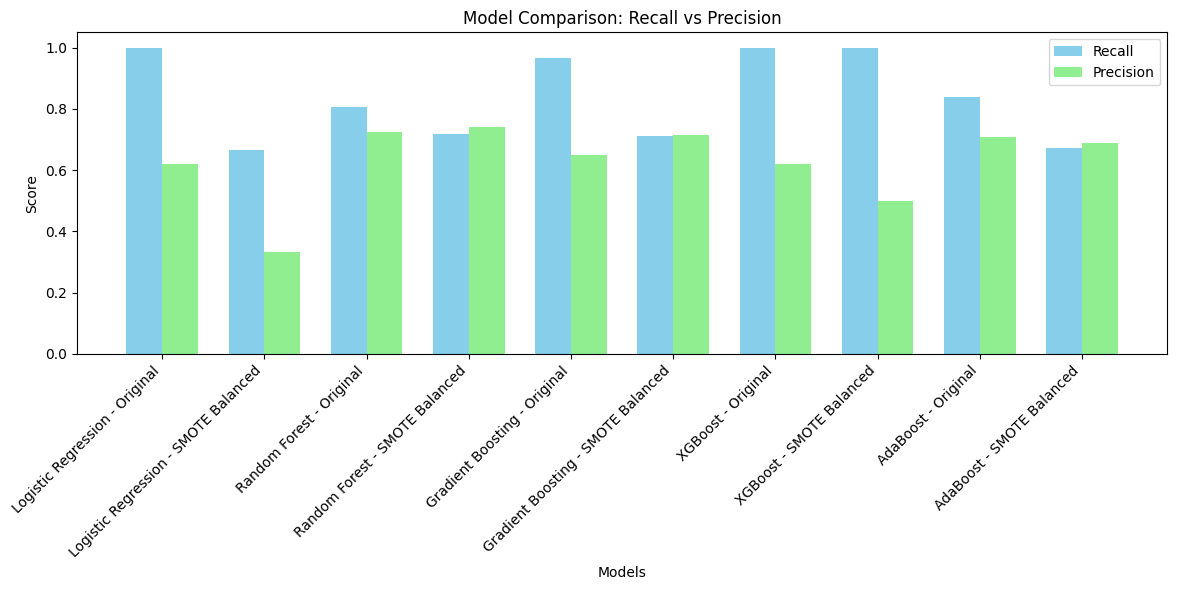


Best model and scaler saved successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Load dataset and preprocess
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")
labels = df['TARGET_5Yrs'].values
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

def evaluate_model(y_true, y_pred):
    """Evaluate model performance using multiple metrics."""
    return {
        'recall': recall_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'accuracy': accuracy_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

def score_classifier(dataset, classifier, labels):
    """Perform 3-fold cross-validation and return average metrics."""
    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    metrics = {
        'recall': 0, 'precision': 0, 'f1': 0, 'accuracy': 0, 'auc': 0,
        'confusion_matrix': np.zeros((2, 2))
    }

    for training_ids, test_ids in kf.split(dataset):
        training_set, training_labels = dataset[training_ids], labels[training_ids]
        test_set, test_labels = dataset[test_ids], labels[test_ids]

        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)
        fold_metrics = evaluate_model(test_labels, predicted_labels)

        for key in metrics:
            if key == 'confusion_matrix':
                metrics[key] += fold_metrics[key]
            else:
                metrics[key] += fold_metrics[key] / 3

    return metrics

# Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [1, 3, 5],
        'booster': ['gbtree', 'gblinear']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Function to perform GridSearchCV
def grid_search(X, y, classifier, param_grid):
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='recall', n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Prepare datasets
X_original, y_original = X_scaled, labels
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, labels)

datasets = {
    "Original": (X_original, y_original),
    "SMOTE Balanced": (X_balanced, y_balanced)
}

# Perform grid search and evaluation for each classifier and dataset
results = {}
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}:")
    for dataset_name, (X, y) in datasets.items():
        print(f"  Dataset: {dataset_name}")
        best_model, best_params, best_score = grid_search(X, y, clf, param_grids[name])
        metrics = score_classifier(X, best_model, y)
        results[f"{name} - {dataset_name}"] = {
            'model': best_model,
            'params': best_params,
            'metrics': metrics
        }
        print(f"    Best parameters: {best_params}")
        print(f"    Metrics: {metrics}")

# Find the best overall model
best_model_name = max(results, key=lambda x: results[x]['metrics']['recall'])
best_model = results[best_model_name]['model']
best_metrics = results[best_model_name]['metrics']

print(f"\nBest overall model: {best_model_name}")
print(f"Best parameters: {results[best_model_name]['params']}")
print(f"Metrics: {best_metrics}")

# Visualize results
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
recalls = [results[name]['metrics']['recall'] for name in model_names]
precisions = [results[name]['metrics']['precision'] for name in model_names]

x = range(len(model_names))
width = 0.35

plt.bar(x, recalls, width, label='Recall', color='skyblue')
plt.bar([i + width for i in x], precisions, width, label='Precision', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Recall vs Precision')
plt.xticks([i + width/2 for i in x], model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model_new_score1.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler_new_score_1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")


Evaluating Logistic Regression:
  Dataset: Original
    Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 1.0, 'precision': 0.6201583049929275, 'f1': 0.765508347555236, 'accuracy': 0.6201583049929275, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 831.]])}
  Dataset: Random Undersampling
    Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
    Metrics: {'recall': 0.9981167608286252, 'precision': 0.505718420641746, 'f1': 0.6708021074277085, 'accuracy': 0.5107785297009659, 'auc': 0.5112663496774965, 'confusion_matrix': array([[ 12., 497.],
       [  1., 508.]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 0.6666666666666666, 'precision': 0.33212996389891697, 'f1': 0.4433722021176786, 'accuracy': 0.4975932611311673, 'auc': 0.5, 'confusion_matrix': array([[275., 556.],
       [279., 552.]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


    Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 0.8132299402941605, 'precision': 0.8197069366800626, 'f1': 0.8157204226169743, 'accuracy': 0.8508395916921001, 'auc': 0.8459768539895419, 'confusion_matrix': array([[379.,  52.],
       [ 56., 237.]])}

Evaluating Random Forest:
  Dataset: Original
    Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
    Metrics: {'recall': 0.8047739553101626, 'precision': 0.7261248516814642, 'f1': 0.7634288408997203, 'accuracy': 0.6910661677417629, 'auc': 0.6549674244679529, 'confusion_matrix': array([[257., 252.],
       [162., 669.]])}
  Dataset: Random Undersampling
    Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
    Metrics: {'recall': 0.6632968111524585, 'precision': 0.6938171698677136, 'f1': 0.6774576915241877, 'accuracy': 0.6846810110474868, 'auc': 0.6854197221038757, 'confusion_matrix': array([[360., 149.],
       [172., 337.]])}
  Datase

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6201583049929275, 'f1': 0.765508347555236, 'accuracy': 0.6201583049929275, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 831.]])}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:56:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Use

    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5}
    Metrics: {'recall': 1.0, 'precision': 0.4999797559141651, 'f1': 0.6662989994062656, 'accuracy': 0.4999797559141651, 'auc': 0.5, 'confusion_matrix': array([[  0., 509.],
       [  0., 509.]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:57:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.5, 'f1': 0.6666615178439691, 'accuracy': 0.5, 'auc': 0.5, 'confusion_matrix': array([[  0., 831.],
       [  0., 831.]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gblinear', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.40468433867151327, 'f1': 0.5748585138058822, 'accuracy': 0.40468433867151327, 'auc': 0.5, 'confusion_matrix': array([[  0., 431.],
       [  0., 293.]])}

Evaluating AdaBoost:
  Dataset: Original


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 200}
    Metrics: {'recall': 0.8372064119961424, 'precision': 0.7082280412022661, 'f1': 0.767134632896958, 'accuracy': 0.6850770624960291, 'auc': 0.6363732408412768, 'confusion_matrix': array([[222., 287.],
       [135., 696.]])}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}
    Metrics: {'recall': 0.6839417486422347, 'precision': 0.6830618289522399, 'f1': 0.6802346935413502, 'accuracy': 0.6797588061773382, 'auc': 0.6814686552350254, 'confusion_matrix': array([[345., 164.],
       [162., 347.]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
    Metrics: {'recall': 0.6737974520250053, 'precision': 0.6895281493691326, 'f1': 0.6814474987572182, 'accuracy': 0.6847172081829122, 'auc': 0.684784556092347, 'confusion_matrix': array([[578., 253.],
       [271., 560.]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


    Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
    Metrics: {'recall': 0.8260128149118975, 'precision': 0.8665293780742537, 'f1': 0.8451971585440059, 'accuracy': 0.8770846907399152, 'auc': 0.869946740181246, 'confusion_matrix': array([[394.,  37.],
       [ 52., 241.]])}

Evaluating Balanced Random Forest:
  Dataset: Original


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
    Metrics: {'recall': 0.648413586829104, 'precision': 0.7928003766095283, 'f1': 0.7129289316677727, 'accuracy': 0.676885932792274, 'auc': 0.6859978025011135, 'confusion_matrix': array([[368., 141.],
       [292., 539.]])}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
    Metrics: {'recall': 0.6624883581952141, 'precision': 0.7039182828556642, 'f1': 0.6820474205836576, 'accuracy': 0.6915524321823124, 'auc': 0.6916769308431067, 'confusion_matrix': array([[367., 142.],
       [172., 337.]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

    Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
    Metrics: {'recall': 0.7195611250112239, 'precision': 0.7287154772137104, 'f1': 0.7237431229787882, 'accuracy': 0.7250300842358605, 'auc': 0.7251417556646391, 'confusion_matrix': array([[607., 224.],
       [233., 598.]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

    Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
    Metrics: {'recall': 0.8918319499053444, 'precision': 0.8677658899411231, 'f1': 0.8792271251573577, 'accuracy': 0.9005863996433592, 'auc': 0.8993119604649222, 'confusion_matrix': array([[391.,  40.],
       [ 32., 261.]])}

Evaluating Easy Ensemble:
  Dataset: Original
    Best parameters: {'n_estimators': 10, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.6319117182679713, 'precision': 0.7915830389042289, 'f1': 0.7018680555555555, 'accuracy': 0.6679306989295853, 'auc': 0.6800147509834084, 'confusion_matrix': array([[370., 139.],
       [306., 525.]])}
  Dataset: Random Undersampling
    Best parameters: {'n_estimators': 50, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.6939465081161772, 'precision': 0.6950252173643986, 'f1': 0.6943769280593705, 'accuracy': 0.6944878246283764, 'auc': 0.6942896201047533, 'confusion_matrix': array([[354., 155.],
       [156., 353.]])}
  Dataset: SMOT

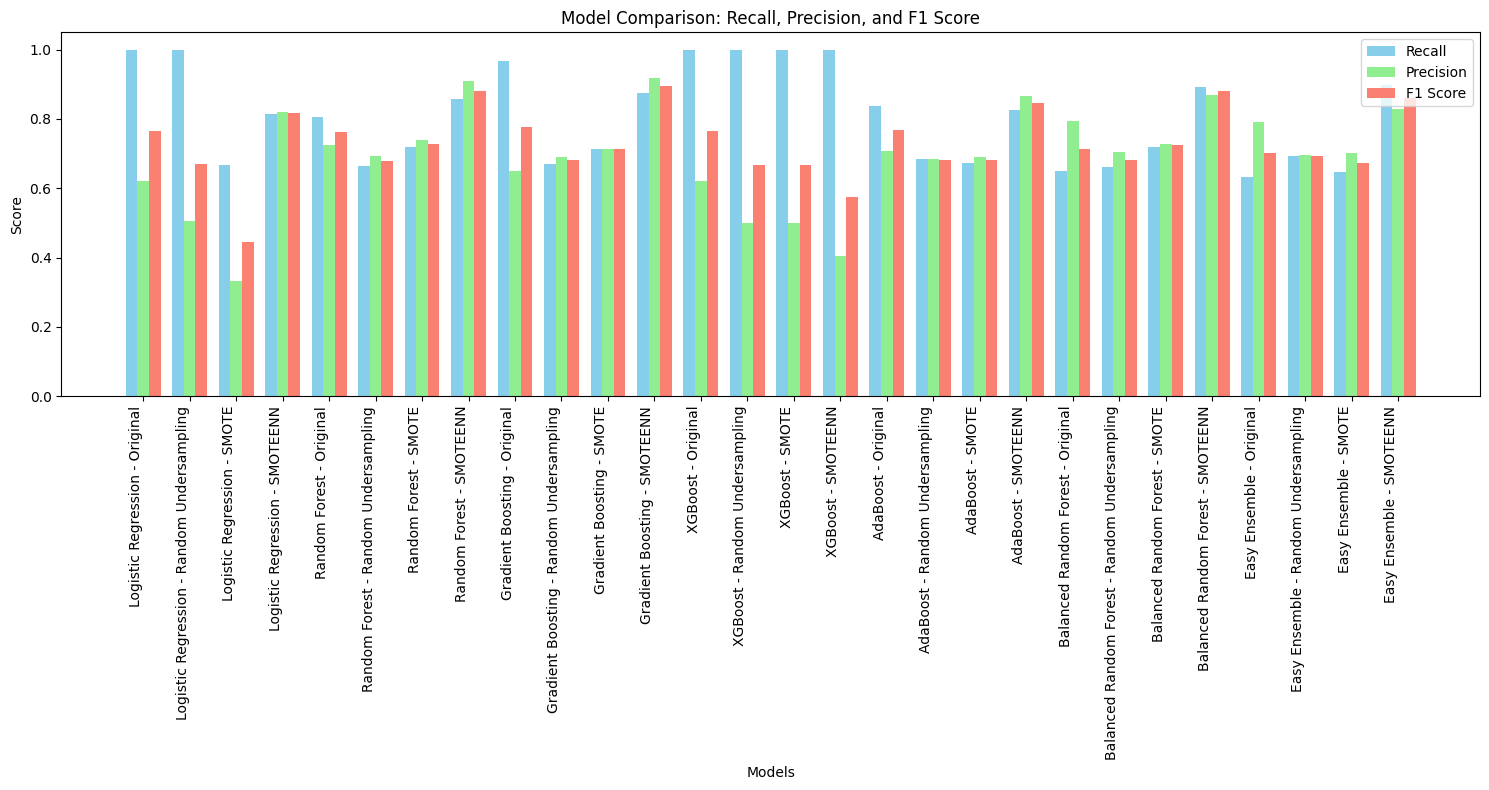


Best model and scaler saved successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Load dataset and preprocess
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")
labels = df['TARGET_5Yrs'].values
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

def evaluate_model(y_true, y_pred):
    """Evaluate model performance using multiple metrics."""
    return {
        'recall': recall_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'accuracy': accuracy_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

def score_classifier(dataset, classifier, labels):
    """Perform 3-fold cross-validation and return average metrics."""
    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    metrics = {
        'recall': 0, 'precision': 0, 'f1': 0, 'accuracy': 0, 'auc': 0,
        'confusion_matrix': np.zeros((2, 2))
    }

    for training_ids, test_ids in kf.split(dataset):
        training_set, training_labels = dataset[training_ids], labels[training_ids]
        test_set, test_labels = dataset[test_ids], labels[test_ids]

        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)
        fold_metrics = evaluate_model(test_labels, predicted_labels)

        for key in metrics:
            if key == 'confusion_matrix':
                metrics[key] += fold_metrics[key]
            else:
                metrics[key] += fold_metrics[key] / 3

    return metrics

# Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [1, 3, 5],
        'booster': ['gbtree', 'gblinear']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    "Balanced Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Easy Ensemble": {
        'n_estimators': [10, 50, 100],
        'sampling_strategy': ['auto', 'majority', 'not minority']
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble": EasyEnsembleClassifier(random_state=42)
}

# Function to perform GridSearchCV
def grid_search(X, y, classifier, param_grid):
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='recall', n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Prepare datasets with different balancing methods
X_original, y_original = X_scaled, labels

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_scaled, labels)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, labels)

smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_scaled, labels)

datasets = {
    "Original": (X_original, y_original),
    "Random Undersampling": (X_undersampled, y_undersampled),
    "SMOTE": (X_smote, y_smote),
    "SMOTEENN": (X_smoteenn, y_smoteenn)
}

# Perform grid search and evaluation for each classifier and dataset
results = {}
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}:")
    for dataset_name, (X, y) in datasets.items():
        print(f"  Dataset: {dataset_name}")
        best_model, best_params, best_score = grid_search(X, y, clf, param_grids[name])
        metrics = score_classifier(X, best_model, y)
        results[f"{name} - {dataset_name}"] = {
            'model': best_model,
            'params': best_params,
            'metrics': metrics
        }
        print(f"    Best parameters: {best_params}")
        print(f"    Metrics: {metrics}")

# Function to select the best model
def select_best_model(results):
    candidates = []
    for name, result in results.items():
        metrics = result['metrics']

        # Primary filter: Recall should be above 0.7 (adjustable threshold)
        if metrics['recall'] > 0.7:
            # Secondary filters
            if metrics['precision'] > 0.3 and metrics['f1'] > 0.4 and metrics['auc'] > 0.6:
                candidates.append((name, result))

    if not candidates:
        print("No models met the criteria. Relaxing constraints...")
        return max(results.items(), key=lambda x: x[1]['metrics']['f1'])

    # Among candidates, choose the one with the highest recall score
    best_model = max(candidates, key=lambda x: x[1]['metrics']['recall'])
    return best_model

# Replace the previous best model selection with this:
best_model_name, best_model_result = select_best_model(results)
best_model = best_model_result['model']
best_metrics = best_model_result['metrics']

print(f"\nBest overall model: {best_model_name}")
print(f"Best parameters: {best_model_result['params']}")
print(f"Metrics: {best_metrics}")

# Add a function to print detailed analysis of top models
def print_top_models_analysis(results, top_n=5):
    sorted_results = sorted(results.items(), key=lambda x: x[1]['metrics']['recall'], reverse=True)

    print(f"\nTop {top_n} models by recall:")
    for i, (name, result) in enumerate(sorted_results[:top_n], 1):
        metrics = result['metrics']
        print(f"{i}. {name}")
        print(f"   Recall: {metrics['recall']:.4f}")
        print(f"   Precision: {metrics['precision']:.4f}")
        print(f"   F1 Score: {metrics['f1']:.4f}")
        print(f"   AUC-ROC: {metrics['auc']:.4f}")
        print(f"   Confusion Matrix:\n{metrics['confusion_matrix']}")
        print()

# Call this function after selecting the best model
print_top_models_analysis(results)

# Visualize results
plt.figure(figsize=(15, 8))
model_names = list(results.keys())
recalls = [results[name]['metrics']['recall'] for name in model_names]
precisions = [results[name]['metrics']['precision'] for name in model_names]
f1_scores = [results[name]['metrics']['f1'] for name in model_names]

x = range(len(model_names))
width = 0.25

plt.bar(x, recalls, width, label='Recall', color='skyblue')
plt.bar([i + width for i in x], precisions, width, label='Precision', color='lightgreen')
plt.bar([i + 2*width for i in x], f1_scores, width, label='F1 Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Recall, Precision, and F1 Score')
plt.xticks([i + width for i in x], model_names, rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")



Evaluating Logistic Regression:
  Dataset: Original
    Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}
  Dataset: Random Undersampling
    Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}
  Dataset: SMOTE
    Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
    Metrics: {'recall': 1.0, 'precision': 0.6329588014981273, 'f1': 0.7752293577981652, 'accuracy': 0.6343283582089553, 'auc': 0.505050505050505, 'confusion_matrix': array([[  1,  98],
       [  0, 169]])}
  Dataset: SMOTEENN
    Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:27:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:27:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gblinear', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]])}

Evaluating AdaBoost:
  Dataset: Original
    Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
    Metrics: {'recall': 0.8816568047337278, 'precision': 0.7061611374407583, 'f1': 0.7842105263157895, 'accuracy': 0.6940298507462687, 'auc': 0.6276970892355507, 'confusion_matrix': array([[ 37,  62],
       [ 20, 149]])}
  Dataset: Random Undersampling
    Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
    Metrics: {'recall': 0.7396449704142012, 'precision': 0.8116883116883117, 'f1': 0.7739938080495357, 'accuracy': 0.7276119402985075, 'auc': 0.7233578387424542, 'confusion_matrix': array([[ 70,  29],
       [ 

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
    Metrics: {'recall': 0.7159763313609467, 'precision': 0.8175675675675675, 'f1': 0.7634069400630915, 'accuracy': 0.7201492537313433, 'auc': 0.721624529316837, 'confusion_matrix': array([[ 72,  27],
       [ 48, 121]])}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
    Metrics: {'recall': 0.727810650887574, 'precision': 0.7884615384615384, 'f1': 0.7569230769230769, 'accuracy': 0.7052238805970149, 'auc': 0.6972386587771204, 'confusion_matrix': array([[ 66,  33],
       [ 46, 123]])}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
    Metrics: {'recall': 0.7810650887573964, 'precision': 0.7674418604651163, 'f1': 0.7741935483870968, 'accuracy': 0.7126865671641791, 'auc': 0.6885123423584962, 'confusion_matrix': array([[ 59,  40],
       [ 37, 132]])}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
    Metrics: {'recall': 0.7041420118343196, 'precision': 0.8206896551724138, 'f1': 0.7579617834394905, 'accuracy': 0.7164179104477612, 'auc': 0.7207578746040284, 'confusion_matrix': array([[ 73,  26],
       [ 50, 119]])}

Evaluating Easy Ensemble:
  Dataset: Original
    Best parameters: {'n_estimators': 10, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.7041420118343196, 'precision': 0.8321678321678322, 'f1': 0.7628205128205128, 'accuracy': 0.7238805970149254, 'auc': 0.7308588847050386, 'confusion_matrix': array([[ 75,  24],
       [ 50, 119]])}
  Dataset: Random Undersampling
    Best parameters: {'n_estimators': 100, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.7396449704142012, 'precision': 0.8333333333333334, 'f1': 0.7836990595611285, 'accuracy': 0.7425373134328358, 'auc': 0.7435598589444743, 'confusion_matrix': array([[ 74,  25],
       [ 44, 125]])}
  Dataset: SMOTE
    Best 

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.6419
  precision: 0.7796
  f1: 0.7038
  accuracy: 0.6689
  auc: 0.6757

Cross-validating Balanced Random Forest - Random Undersampling


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.6588
  precision: 0.6525
  f1: 0.6556
  accuracy: 0.6561
  auc: 0.6545

Cross-validating Balanced Random Forest - SMOTE


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.7188
  precision: 0.7363
  f1: 0.7272
  accuracy: 0.7304
  auc: 0.7299

Cross-validating Balanced Random Forest - SMOTEENN


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.9059
  precision: 0.8773
  f1: 0.8911
  accuracy: 0.9094
  auc: 0.9086

Cross-validating Easy Ensemble - Original
Average CV scores:
  recall: 0.6317
  precision: 0.7827
  f1: 0.6986
  accuracy: 0.6642
  auc: 0.6752

Cross-validating Easy Ensemble - Random Undersampling
Average CV scores:
  recall: 0.6565
  precision: 0.6694
  f1: 0.6628
  accuracy: 0.6683
  auc: 0.6674

Cross-validating Easy Ensemble - SMOTE
Average CV scores:
  recall: 0.6656
  precision: 0.7033
  f1: 0.6835
  accuracy: 0.6926
  auc: 0.6922

Cross-validating Easy Ensemble - SMOTEENN
Average CV scores:
  recall: 0.8897
  precision: 0.8643
  f1: 0.8754
  accuracy: 0.8955
  auc: 0.8944

Final testing on consistent test set:

Random Forest - Original:
  recall: 0.8402
  precision: 0.7100
  f1: 0.7696
  accuracy: 0.6828
  auc: 0.6272
  Confusion Matrix:
[[ 41  58]
 [ 27 142]]

Random Forest - Random Undersampling:
  recall: 0.7101
  precision: 0.7895
  f1: 0.7477
  accuracy: 0.6978
  auc: 0.

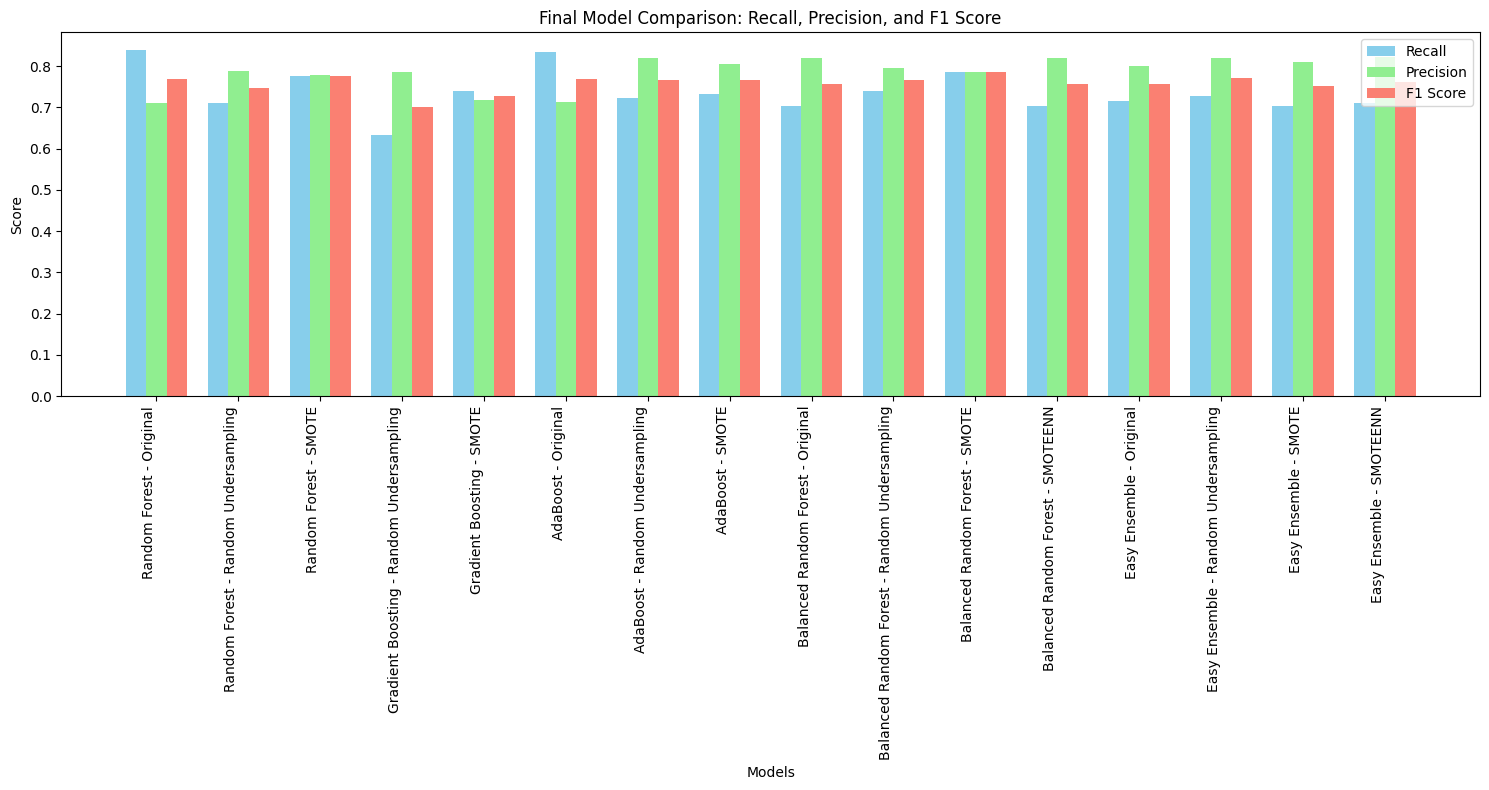


Final best model: Random Forest - Original
Metrics:
  recall: 0.8402
  precision: 0.7100
  f1: 0.7696
  accuracy: 0.6828
  auc: 0.6272
Confusion Matrix:
[[ 41  58]
 [ 27 142]]

Best model and scaler saved successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Load dataset and preprocess
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")
labels = df['TARGET_5Yrs'].values
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

def evaluate_model(y_true, y_pred):
    """Evaluate model performance using multiple metrics."""
    return {
        'recall': recall_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'accuracy': accuracy_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

# Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [1, 3, 5],
        'booster': ['gbtree', 'gblinear']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME']
    },
    "Balanced Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Easy Ensemble": {
        'n_estimators': [10, 50, 100],
        'sampling_strategy': ['auto', 'majority', 'not minority']
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble": EasyEnsembleClassifier(random_state=42)
}

# Prepare balanced datasets for training
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

balanced_datasets = {
    "Original": (X_train, y_train),
    "Random Undersampling": (X_train_undersampled, y_train_undersampled),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smoteenn, y_train_smoteenn)
}

# Model Building and Initial Evaluation
results = {}
for clf_name, clf in classifiers.items():
    print(f"\nEvaluating {clf_name}:")
    for dataset_name, (X_train_balanced, y_train_balanced) in balanced_datasets.items():
        print(f"  Dataset: {dataset_name}")

        # Perform GridSearchCV
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=3, scoring='recall', n_jobs=-1)
        grid_search.fit(X_train_balanced, y_train_balanced)

        # Get best model and evaluate on test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)

        results[f"{clf_name} - {dataset_name}"] = {
            'model': best_model,
            'params': grid_search.best_params_,
            'metrics': metrics
        }
        print(f"    Best parameters: {grid_search.best_params_}")
        print(f"    Metrics: {metrics}")

# Function to select the best models
def select_best_models(results, threshold=0.7):
    candidates = []
    for name, result in results.items():
        metrics = result['metrics']
        if metrics['recall'] > threshold and metrics['precision'] > 0.3 and metrics['f1'] > 0.4 and metrics['auc'] > 0.6:
            candidates.append((name, result))
    return candidates

# Select best models
best_models = select_best_models(results)

print("\nBest models selected for cross-validation:")
for name, _ in best_models:
    print(f"- {name}")

# Cross-Validation
def cross_validate(X, y, model, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        cv_scores.append(evaluate_model(y_val_cv, y_pred_cv))
    return cv_scores

print("\nPerforming cross-validation on best models:")
cv_results = {}
for name, result in best_models:
    print(f"\nCross-validating {name}")
    model = result['model']
    X, y = balanced_datasets[name.split(' - ')[1]]
    cv_scores = cross_validate(X, y, model)
    cv_results[name] = cv_scores

    # Print average scores
    avg_scores = {metric: np.mean([score[metric] for score in cv_scores]) for metric in cv_scores[0] if metric != 'confusion_matrix'}
    print("Average CV scores:")
    for metric, value in avg_scores.items():
        print(f"  {metric}: {value:.4f}")

# Final Testing on Consistent Test Set
print("\nFinal testing on consistent test set:")
final_results = {}
for name, result in best_models:
    model = result['model']
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    final_results[name] = metrics
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if metric != 'confusion_matrix':
            print(f"  {metric}: {value:.4f}")
    print(f"  Confusion Matrix:\n{metrics['confusion_matrix']}")

# Visualization
plt.figure(figsize=(15, 8))
model_names = list(final_results.keys())
recalls = [final_results[name]['recall'] for name in model_names]
precisions = [final_results[name]['precision'] for name in model_names]
f1_scores = [final_results[name]['f1'] for name in model_names]

x = range(len(model_names))
width = 0.25

plt.bar(x, recalls, width, label='Recall', color='skyblue')
plt.bar([i + width for i in x], precisions, width, label='Precision', color='lightgreen')
plt.bar([i + 2*width for i in x], f1_scores, width, label='F1 Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Final Model Comparison: Recall, Precision, and F1 Score')
plt.xticks([i + width for i in x], model_names, rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Select the final best model
final_best_model_name = max(final_results, key=lambda x: final_results[x]['recall'])
final_best_model = next(result['model'] for name, result in best_models if name == final_best_model_name)

print(f"\nFinal best model: {final_best_model_name}")
print("Metrics:")
for metric, value in final_results[final_best_model_name].items():
    if metric != 'confusion_matrix':
        print(f"  {metric}: {value:.4f}")
print(f"Confusion Matrix:\n{final_results[final_best_model_name]['confusion_matrix']}")

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model.pkl', 'wb') as model_file:
    pickle.dump(final_best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")


Evaluating Logistic Regression:
  Dataset: Original
    Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}
  Dataset: Random Undersampling
    Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}
  Dataset: SMOTE
    Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
    Metrics: {'recall': 1.0, 'precision': 0.6329588014981273, 'f1': 0.7752293577981652, 'accuracy': 0.6343283582089553, 'auc': 0.505050505050505, 'confusion_matrix': array([[  1,  98],
       [  0, 169]]), 'specificity': 0.010101010101010102}
  Dataset: SMO

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Best parameters: {'booster': 'gblinear', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
    Metrics: {'recall': 1.0, 'precision': 0.6305970149253731, 'f1': 0.7734553775743707, 'accuracy': 0.6305970149253731, 'auc': 0.5, 'confusion_matrix': array([[  0,  99],
       [  0, 169]]), 'specificity': 0.0}

Evaluating AdaBoost:
  Dataset: Original
    Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
    Metrics: {'recall': 0.8816568047337278, 'precision': 0.7061611374407583, 'f1': 0.7842105263157895, 'accuracy': 0.6940298507462687, 'auc': 0.6276970892355507, 'confusion_matrix': array([[ 37,  62],
       [ 20, 149]]), 'specificity': 0.37373737373737376}
  Dataset: Random Undersampling
    Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
    Metrics: {'recall': 0.7396449704142012, 'precision': 0.8116883116883117, 'f1': 0.7739938080495357, 'accuracy': 0.7276119402985075, 'auc': 0.7233578387

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
    Metrics: {'recall': 0.7159763313609467, 'precision': 0.8175675675675675, 'f1': 0.7634069400630915, 'accuracy': 0.7201492537313433, 'auc': 0.721624529316837, 'confusion_matrix': array([[ 72,  27],
       [ 48, 121]]), 'specificity': 0.7272727272727273}
  Dataset: Random Undersampling


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
    Metrics: {'recall': 0.727810650887574, 'precision': 0.7884615384615384, 'f1': 0.7569230769230769, 'accuracy': 0.7052238805970149, 'auc': 0.6972386587771204, 'confusion_matrix': array([[ 66,  33],
       [ 46, 123]]), 'specificity': 0.6666666666666666}
  Dataset: SMOTE


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
    Metrics: {'recall': 0.7810650887573964, 'precision': 0.7674418604651163, 'f1': 0.7741935483870968, 'accuracy': 0.7126865671641791, 'auc': 0.6885123423584962, 'confusion_matrix': array([[ 59,  40],
       [ 37, 132]]), 'specificity': 0.5959595959595959}
  Dataset: SMOTEENN


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


    Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
    Metrics: {'recall': 0.7041420118343196, 'precision': 0.8206896551724138, 'f1': 0.7579617834394905, 'accuracy': 0.7164179104477612, 'auc': 0.7207578746040284, 'confusion_matrix': array([[ 73,  26],
       [ 50, 119]]), 'specificity': 0.7373737373737373}

Evaluating Easy Ensemble:
  Dataset: Original
    Best parameters: {'n_estimators': 10, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.7041420118343196, 'precision': 0.8321678321678322, 'f1': 0.7628205128205128, 'accuracy': 0.7238805970149254, 'auc': 0.7308588847050386, 'confusion_matrix': array([[ 75,  24],
       [ 50, 119]]), 'specificity': 0.7575757575757576}
  Dataset: Random Undersampling
    Best parameters: {'n_estimators': 100, 'sampling_strategy': 'auto'}
    Metrics: {'recall': 0.7396449704142012, 'precision': 0.8333333333333334, 'f1': 0.7836990595611285, 'accuracy': 0.7425373134328358, 'auc': 0.7435598589444743, 'confusion_matri

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.6419
  precision: 0.7796
  f1: 0.7038
  accuracy: 0.6689
  auc: 0.6757
  specificity: 0.7094

Cross-validating Balanced Random Forest - Random Undersampling


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.6588
  precision: 0.6525
  f1: 0.6556
  accuracy: 0.6561
  auc: 0.6545
  specificity: 0.6503

Cross-validating Balanced Random Forest - SMOTE


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.7188
  precision: 0.7363
  f1: 0.7272
  accuracy: 0.7304
  auc: 0.7299
  specificity: 0.7411

Cross-validating Balanced Random Forest - SMOTEENN


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Average CV scores:
  recall: 0.9059
  precision: 0.8773
  f1: 0.8911
  accuracy: 0.9094
  auc: 0.9086
  specificity: 0.9113

Cross-validating Easy Ensemble - Original
Average CV scores:
  recall: 0.6317
  precision: 0.7827
  f1: 0.6986
  accuracy: 0.6642
  auc: 0.6752
  specificity: 0.7187

Cross-validating Easy Ensemble - Random Undersampling
Average CV scores:
  recall: 0.6565
  precision: 0.6694
  f1: 0.6628
  accuracy: 0.6683
  auc: 0.6674
  specificity: 0.6783

Cross-validating Easy Ensemble - SMOTE
Average CV scores:
  recall: 0.6656
  precision: 0.7033
  f1: 0.6835
  accuracy: 0.6926
  auc: 0.6922
  specificity: 0.7188

Cross-validating Easy Ensemble - SMOTEENN
Average CV scores:
  recall: 0.8897
  precision: 0.8643
  f1: 0.8754
  accuracy: 0.8955
  auc: 0.8944
  specificity: 0.8992

Final testing on consistent test set:

Logistic Regression - SMOTEENN:
  recall: 0.6272
  precision: 0.8154
  f1: 0.7090
  accuracy: 0.6754
  auc: 0.6924
  specificity: 0.7576
  Confusion Matrix:
[[

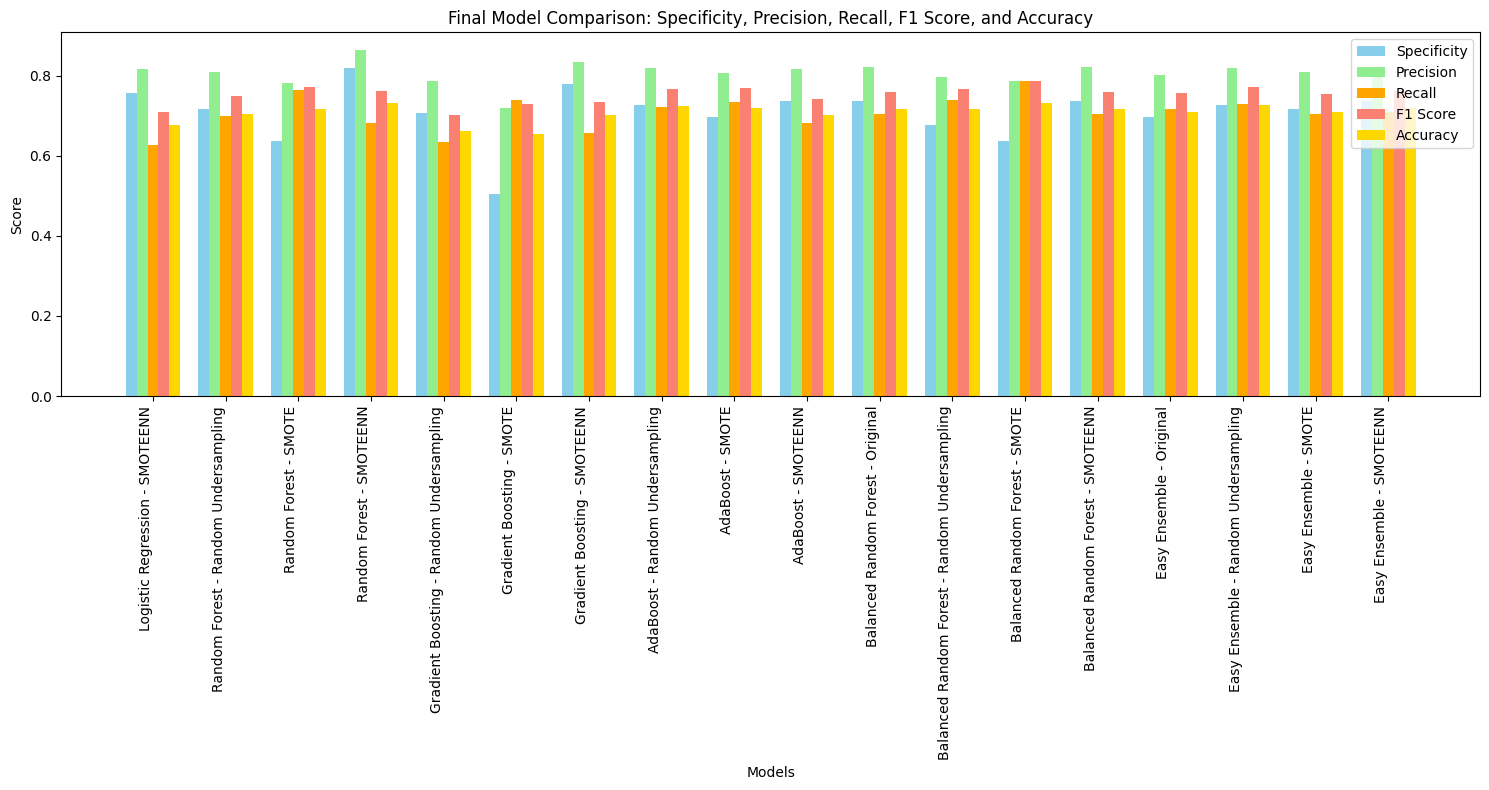


Final best model: Random Forest - SMOTEENN
Metrics:
  recall: 0.6805
  precision: 0.8647
  f1: 0.7616
  accuracy: 0.7313
  auc: 0.7493
  specificity: 0.8182
Confusion Matrix:
[[ 81  18]
 [ 54 115]]

Best model and scaler saved successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Load dataset and preprocess
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nba_data/nba_logreg.csv")
labels = df['TARGET_5Yrs'].values
selected_features = [
    'GP', 'MIN', 'PTS', 'FG%', '3P Made', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]
df_vals = df[selected_features]

imputer = SimpleImputer(strategy='mean')
df_vals_imputed = imputer.fit_transform(df_vals)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_vals_imputed)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

def evaluate_model(y_true, y_pred):
    """Evaluate model performance using multiple metrics."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    specificity = tn / (tn + fp)  # Specificity or True Negative Rate

    return {
        'recall': recall_score(y_true, y_pred),  # Same as sensitivity
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'accuracy': accuracy_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'specificity': specificity
    }

# Define parameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [1, 3, 5],
        'booster': ['gbtree', 'gblinear']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME']
    },
    "Balanced Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Easy Ensemble": {
        'n_estimators': [10, 50, 100],
        'sampling_strategy': ['auto', 'majority', 'not minority']
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble": EasyEnsembleClassifier(random_state=42)
}

# Prepare balanced datasets for training
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

balanced_datasets = {
    "Original": (X_train, y_train),
    "Random Undersampling": (X_train_undersampled, y_train_undersampled),
    "SMOTE": (X_train_smote, y_train_smote),
    "SMOTEENN": (X_train_smoteenn, y_train_smoteenn)
}

# Model Building and Initial Evaluation
results = {}
for clf_name, clf in classifiers.items():
    print(f"\nEvaluating {clf_name}:")
    for dataset_name, (X_train_balanced, y_train_balanced) in balanced_datasets.items():
        print(f"  Dataset: {dataset_name}")

        # Perform GridSearchCV
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=3, scoring='recall', n_jobs=-1)
        grid_search.fit(X_train_balanced, y_train_balanced)

        # Get best model and evaluate on test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)

        results[f"{clf_name} - {dataset_name}"] = {
            'model': best_model,
            'params': grid_search.best_params_,
            'metrics': metrics
        }
        print(f"    Best parameters: {grid_search.best_params_}")
        print(f"    Metrics: {metrics}")

# Function to select the best models
def select_best_models(results, recall_threshold=0.5):
    candidates = []
    for name, result in results.items():
        metrics = result['metrics']
        if metrics['recall'] > recall_threshold and metrics['precision'] > 0.4 and metrics['f1'] > 0.4 and metrics['auc'] > 0.6 and metrics['specificity']>0.5:
            candidates.append((name, result))
    return candidates

# Select best models
best_models = select_best_models(results)

print("\nBest models selected for cross-validation:")
for name, _ in best_models:
    print(f"- {name}")

# Cross-Validation
def cross_validate(X, y, model, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    for train_index, val_index in kf.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        cv_scores.append(evaluate_model(y_val_cv, y_pred_cv))
    return cv_scores

print("\nPerforming cross-validation on best models:")
cv_results = {}
for name, result in best_models:
    print(f"\nCross-validating {name}")
    model = result['model']
    X, y = balanced_datasets[name.split(' - ')[1]]
    cv_scores = cross_validate(X, y, model)
    cv_results[name] = cv_scores

    # Print average scores
    avg_scores = {metric: np.mean([score[metric] for score in cv_scores]) for metric in cv_scores[0] if metric != 'confusion_matrix'}
    print("Average CV scores:")
    for metric, value in avg_scores.items():
        print(f"  {metric}: {value:.4f}")

# Final Testing on Consistent Test Set
print("\nFinal testing on consistent test set:")
final_results = {}
for name, result in best_models:
    model = result['model']
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred)
    final_results[name] = metrics
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if metric != 'confusion_matrix':
            print(f"  {metric}: {value:.4f}")
    print(f"  Confusion Matrix:\n{metrics['confusion_matrix']}")

# Visualization
plt.figure(figsize=(15, 8))

# Retrieve model names
model_names = list(final_results.keys())

# Extract the metrics
specificities = [final_results[name]['specificity'] for name in model_names]
precisions = [final_results[name]['precision'] for name in model_names]
recalls = [final_results[name]['recall'] for name in model_names]  # Added recall
f1_scores = [final_results[name]['f1'] for name in model_names]
accuracies = [final_results[name]['accuracy'] for name in model_names]

# X-axis positions and width of bars
x = range(len(model_names))
width = 0.15  # Reduced width to accommodate more bars

# Plot each metric as a separate bar
plt.bar(x, specificities, width, label='Specificity', color='skyblue')
plt.bar([i + width for i in x], precisions, width, label='Precision', color='lightgreen')
plt.bar([i + 2*width for i in x], recalls, width, label='Recall', color='orange')  # Added recall
plt.bar([i + 3*width for i in x], f1_scores, width, label='F1 Score', color='salmon')
plt.bar([i + 4*width for i in x], accuracies, width, label='Accuracy', color='gold')

# Labeling the plot
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Final Model Comparison: Specificity, Precision, Recall, F1 Score, and Accuracy')

# Adjust the x-ticks for the model names
plt.xticks([i + 2*width for i in x], model_names, rotation=90, ha='right')

# Add a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Select the final best model based on specificity
final_best_model_name = max(final_results, key=lambda x: final_results[x]['specificity'])
final_best_model = next(result['model'] for name, result in best_models if name == final_best_model_name)

print(f"\nFinal best model: {final_best_model_name}")
print("Metrics:")
for metric, value in final_results[final_best_model_name].items():
    if metric != 'confusion_matrix':
        print(f"  {metric}: {value:.4f}")
print(f"Confusion Matrix:\n{final_results[final_best_model_name]['confusion_matrix']}")

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model.pkl', 'wb') as model_file:
    pickle.dump(final_best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")


In [ ]:
# Select the final best model based on specificity
final_best_model_name = max(final_results, key=lambda x: final_results[x]['recall'])
final_best_model = next(result['model'] for name, result in best_models if name == final_best_model_name)

print(f"\nFinal best model: {final_best_model_name}")
print("Metrics:")
for metric, value in final_results[final_best_model_name].items():
    if metric != 'confusion_matrix':
        print(f"  {metric}: {value:.4f}")
print(f"Confusion Matrix:\n{final_results[final_best_model_name]['confusion_matrix']}")

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model_recall_with_spec_1.pkl', 'wb') as model_file:
    pickle.dump(final_best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler_recall_with_spec_1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")


Final best model: Random Forest - Original
Metrics:
  recall: 0.8402
  precision: 0.7282
  f1: 0.7802
  accuracy: 0.7015
  auc: 0.6524
  specificity: 0.4646
Confusion Matrix:
[[ 46  53]
 [ 27 142]]

Best model and scaler saved successfully.


In [1]:
final_best_model_name = max(final_results, key=lambda x: final_results[x]['recall'])
final_best_model = next(result['model'] for name, result in best_models if name == final_best_model_name)

print(f"\nFinal best model: {final_best_model_name}")
print("Metrics:")
for metric, value in final_results[final_best_model_name].items():
    if metric != 'confusion_matrix':
        print(f"  {metric}: {value:.4f}")
print(f"Confusion Matrix:\n{final_results[final_best_model_name]['confusion_matrix']}")

# Save the best model
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/best_model.pkl', 'wb') as model_file:
    pickle.dump(final_best_model, model_file)

# Save the scaler
with open('/content/drive/MyDrive/Colab Notebooks/nba_data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nBest model and scaler saved successfully.")

NameError: name 'final_results' is not defined